# RAPL Energy Consumption

In [4]:
pip install matplotlib

     |████████████████████████████████| 11.6 MB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.6 MB 113.6 MB/s eta 0:00:01
     |████████████████████████████████| 1.6 MB 101.6 MB/s eta 0:00:01
     |████████████████████████████████| 103 kB 116.7 MB/s eta 0:00:01
     |████████████████████████████████| 304 kB 104.5 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [5]:
import os
from pathlib import Path
import time
import math
from matplotlib import pyplot as plt
import subprocess
import numpy as np


**Note:** this notebook is meant to be executed on the supplied Docker image.

This notebook provides ...

## RAPL sysfs Interface

Set the `cpu_zone` as in lab 02:

In [6]:
cpu_zone = '/sys/devices/virtual/powercap/...'  # complete this path

Let's verify whether this zone seems like the zone of your CPU.

In [8]:
if os.path.isdir(cpu_zone):
    print('✓ Zone exists')
else:
    print('✗ Zone does not exist!')

name = Path(f'{cpu_zone}/name').read_text().strip()

if name.startswith('package-'):
    print('✓ Its name starts with \'package-\'')
else:
    print('✗ Its zone does not start with \'package-\'!')

if os.path.isfile(f'{cpu_zone}/energy_uj'):
    print('✓ File \'energy_uj\' exists')
else:
    print('✗ File \'energy_uj\' does not exist!')

✓ Zone exists
✓ Its name starts with 'package-'
✓ File 'energy_uj' exists


Complete the following code as in lab 02

In [9]:
def energy_uj():
    raise exception('Not implemented')

def energy_consumption(energy_uj_start, energy_uj_end):
    raise exception('Not implemented')

Current energy counter value: 28614206288


Write function to set long term powercap.

In [10]:
def set_powercap(watts_limit: int):
    raise exception('Not implemented')

Implement following metric functions

In [11]:
def edp(energy: float, time: float):
    raise exception('Not implemented')

def eds(energy: float, time: float, alpha: float, beta: float):
    raise exception('Not implemented')

def edd(energy: float, time: float, alpha: float, beta: float):
    raise exception('Not implemented')

def percent_diff(energy: float, time: float, init_energy: float, init_time: float):
    raise exception('Not implemented')

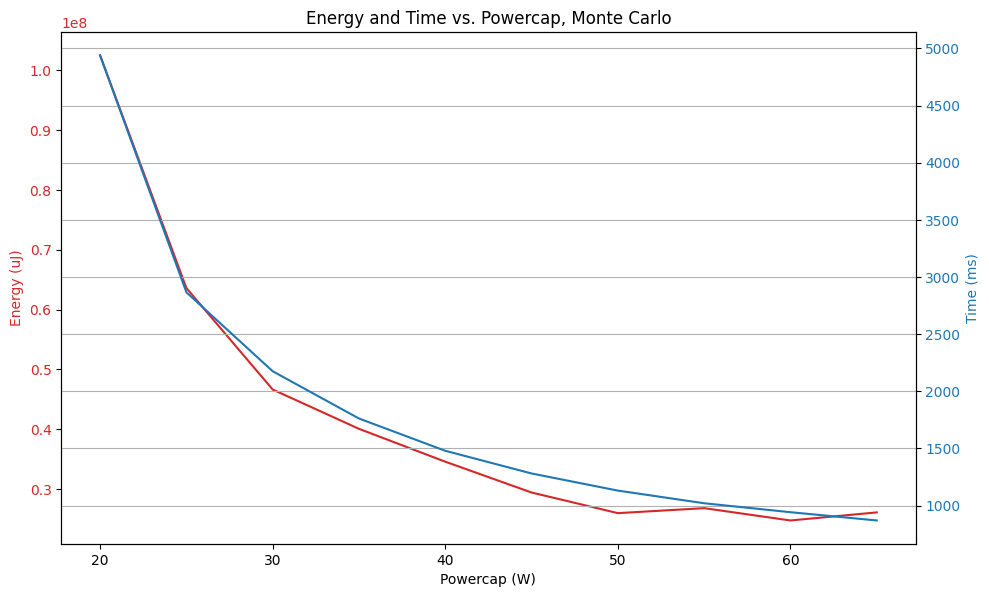

In [34]:
from math import sin, cos, radians

def run_task(pi_monte_carlo: bool, *args):
    if pi_monte_carlo:
        points = 100_000
        inside = 0
        
        for _ in range(points):
            x = np.random.uniform(-1, 1)
            y = np.random.uniform(-1, 1)
            if x ** 2 + y ** 2 <= 1:
                inside += 1

        pi = 4 * inside / points
        return
    
    product = 1.0
    for counter in range(1, 100, 1):
        for dex in list(range(1, 360, 1)):
            angle = radians(dex)
            product *= sin(angle)**2 + cos(angle)**2
    return product


def benchmark_once(pi_monte_carlo: bool, powercap_w: int):
    set_powercap(powercap_w)

    time1 = time.time()
    # energy1 = 0
    energy1 = energy_uj()
    time.sleep(300/powercap_w**1.5)
    run_task(pi_monte_carlo, *args)
    time2 = time.time()
    energy2 = energy_uj()

    total_time = time2 - time1
    total_energy = energy_consumption(energy1, energy2)
    return total_time * 1000, total_energy

Implement benchmark_ntimes function. It should return average of n calls for benchmark_once. Skip boundary values

In [ ]:
def benchmark_ntimes(pi_monte_carlo: bool, times: int, powercap_w: int):
    raise exception('Not implemented')
    # avg_time = ???
    # avg_energy = ???
    # return avg_time, avg_energy

Check your processor TDP and set variable my_tdp. Set value in W.

In [2]:
# my_tdp = ???
tested_powercaps = [i for i in range(20, my_tdp + 5, 5)]

Let's plot energy consumptions & time using above benchmark

In [ ]:
energies = []
times = []
ntimes = 8
use_monte_carlo = True
text = 'Monte Carlo' if use_monte_carlo else 'Liczenie sin i cos'
file_name = 'monte_carlo' if use_monte_carlo else 'sin_cos_operations'

for powercap in tested_powercaps:
    time_result, energy_result = benchmark_ntimes(use_monte_carlo, ntimes, powercap)
    energies.append(energy_result)
    times.append(time_result)

fig, ax1 = plt.subplots(figsize=(10, 6))

color = 'tab:red'
ax1.set_xlabel('Powercap (W)')
ax1.set_ylabel('Energy (uJ)', color=color)
ax1.plot(tested_powercaps, energies, color=color, label='Energy')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Time (ms)', color=color)
ax2.plot(tested_powercaps, times, color=color, label='Time')
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title(f'Energy and Time vs. Powercap, {text}')
plt.grid(True)
plt.savefig(f'{file_name}.png')
plt.show()

Let's plot out metric

In [37]:
edps = []
eds_values = []
edds = []
percent_diffs = []

initial_time, initial_energy = times[-1], energies[-1]
k_values = [1.5, 2]


alpha_values = [(k - 1) / (k * initial_energy) for k in k_values]
beta_values = [1 / (k * initial_time) for k in k_values]
eds_values = [[] for _ in k_values]
edds = [[] for _ in k_values]

for i in range(len(times)):
    time_result, energy_result = times[i], energies[i]
    edps.append(edp(energy_result, time_result))
    percent_diffs.append(percent_diff(energy_result, time_result, initial_energy, initial_time))
    for j, (alpha, beta) in enumerate(zip(alpha_values, beta_values)):
        eds_values[j].append(eds(energy_result, time_result, alpha, beta))
        edds[j].append(edd(energy_result, time_result, alpha, beta))


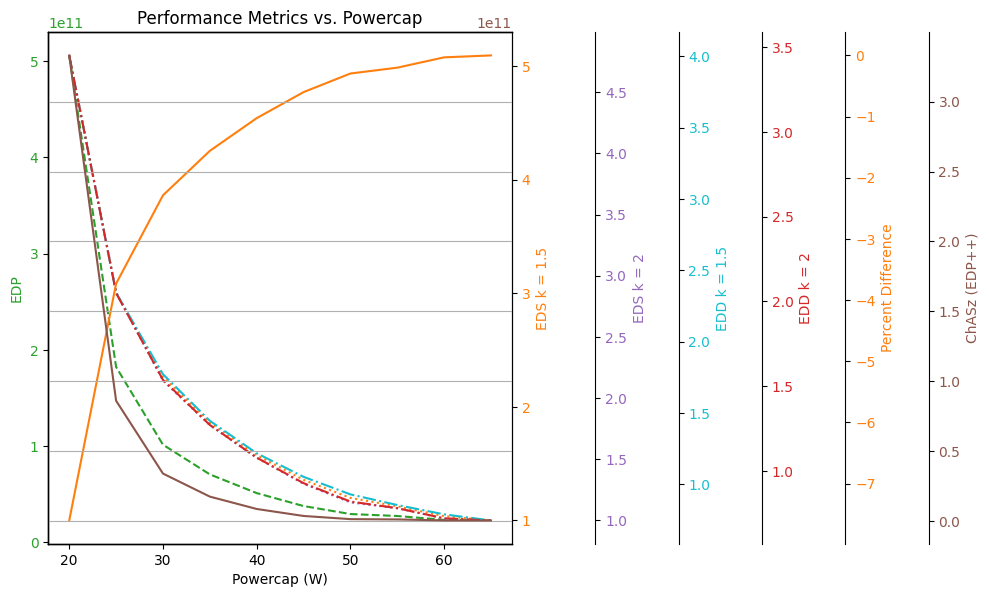

In [38]:
fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Powercap (W)')

offset = 0
colors = ['orange', 'purple', 'cyan', 'red', 'orange', 'brown', 'olive', 'pink', 'blue', 'grey']

# EDP plot
color = 'tab:green'
ax1.set_ylabel('EDP', color=color)
ax1.plot(tested_powercaps, edps, color=color, linestyle='--', label='EDP')
ax1.tick_params(axis='y', labelcolor=color)

# EDS plot
for plot, k in zip(eds_values, k_values):
    ax4 = ax1.twinx()
    color = f'tab:{colors[offset // 60]}'
    ax4.spines['right'].set_position(('outward', offset))
    offset += 60
    ax4.set_ylabel(f'EDS k = {k}', color=color)
    ax4.plot(tested_powercaps, plot, color=color, linestyle=':', label='EDS')
    ax4.tick_params(axis='y', labelcolor=color)

# EDD plot
for plot, k in zip(edds, k_values):
    ax5 = ax1.twinx()
    color = f'tab:{colors[offset // 60]}'
    ax5.spines['right'].set_position(('outward', offset))
    offset += 60
    ax5.set_ylabel(f'EDD k = {k}', color=color)
    ax5.plot(tested_powercaps, plot, color=color, linestyle='-.', label='EDD')
    ax5.tick_params(axis='y', labelcolor=color)

# Percent Difference plot
ax6 = ax1.twinx()
color = f'tab:{colors[offset // 60]}'
ax6.spines['right'].set_position(('outward', offset))
offset += 60
ax6.set_ylabel('Percent Difference', color=color)
ax6.plot(tested_powercaps, percent_diffs, color=color, linestyle='-', label='Percent Difference')
ax6.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.title('Performance Metrics vs. Powercap')
plt.grid(True)
plt.show()

1.962039161930378


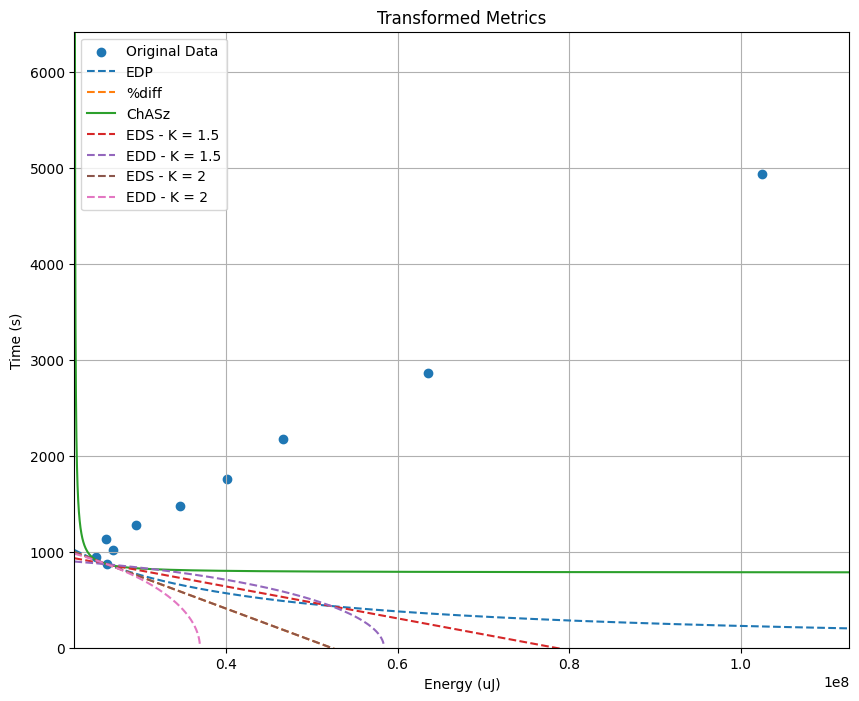

In [39]:

def trans_edp(E):
    c = min([edp(e, t) for e, t in zip(energies, times)])
    return c/E

def f_trans_eds(index):
        
    def trans_eds(E):
        alpha = alpha_values[index]
        beta = beta_values[index]
        c = min([eds(e, t, alpha, beta) for e, t in zip(energies, times)])
        return -alpha/beta * E + c/beta
    
    return trans_eds;

def f_trans_edd(index):

    def trans_edd(E):
        alpha = alpha_values[index]
        beta = beta_values[index]
        c = min([edd(e, t, alpha, beta) for e, t in zip(energies, times)])
        d = c**2 - (alpha*E)**2
        if d < 0:
            return None
        return np.sqrt(d)/beta
    
    return trans_edd;

def trans_percent_diff(E):
    c = max([percent_diff(e, t, initial_energy, initial_time) for e, t in zip(energies, times)])
    return c + (initial_energy - E)/initial_energy * initial_time + initial_time


transformed_metrics = \
{
    "EDP": trans_edp,
    "%diff": trans_percent_diff
}

for i, k in enumerate(k_values):
    transformed_metrics[f"EDS - K = {k}"] = f_trans_eds(i)
    transformed_metrics[f"EDD - K = {k}"] = f_trans_edd(i)
      
# Plotting
fig, ax = plt.subplots(figsize=(10, 6))

# Plot original data
ax.scatter(energies, times, label='Original Data', color='tab:blue')
ax.set_ylim([0, max(times) * 1.3] )
ax.set_xlim([0.9 * min(energies), max(energies) * 1.1] )

# Plot transformed metrics
for label, metric_func in transformed_metrics.items():
    energy_range = np.linspace(0.9 * min(energies), max(energies) * 1.1, 20000)
    time_range = [metric_func(energy) for energy in energy_range]
    ax.plot(energy_range, time_range, label=label, linestyle="-" if label == "ChASz" else '--')

ax.set_xlabel('Energy (uJ)')
ax.set_ylabel('Time (s)')
ax.set_title('Transformed Metrics')
ax.legend()

ax.figure.set_figheight(8)
plt.grid(True)
plt.show()